In [1]:
# from src.dataLoader import dataLoader
# from src.utils import plot_image, get_image
import numpy as np
import cv2
from skimage import morphology,measure
%load_ext autoreload
%autoreload
from src.dataLoader import dataLoader
from src.utils import image_utils, ismember

from src.preprocessing import imadjust,imagecrop

In [2]:
dataset = dataLoader("./data")
imageFileList = dataset.LoadFileList()

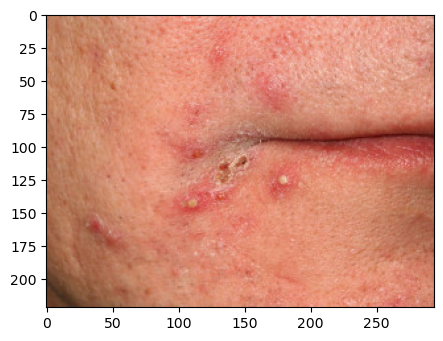

(222, 294, 3)
-5.122274e-09 1.0


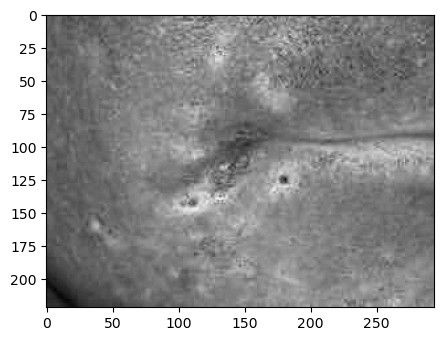

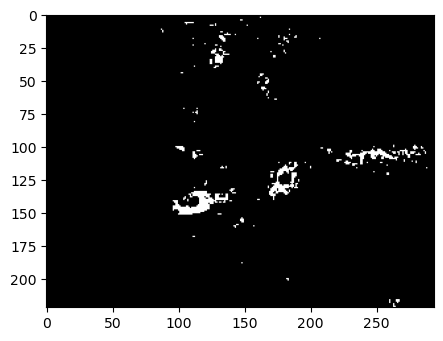

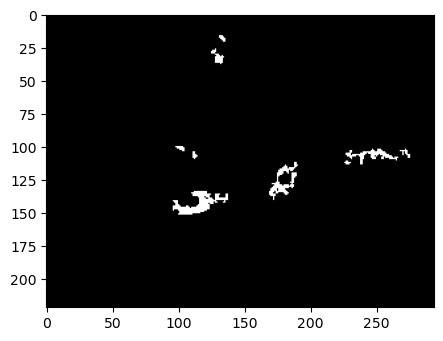

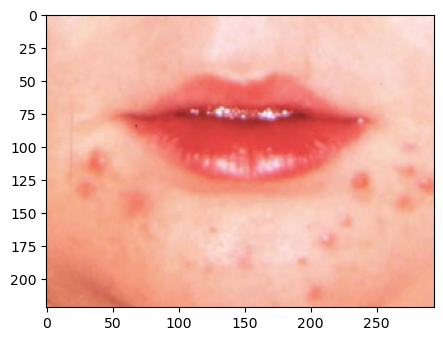

(222, 294, 3)
-1.44355e-08 1.0


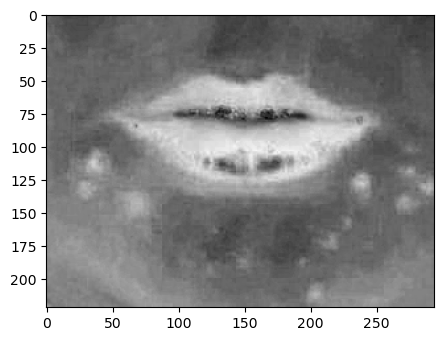

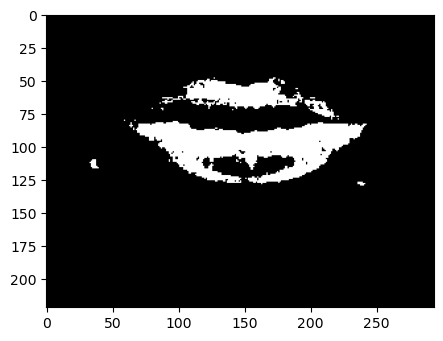

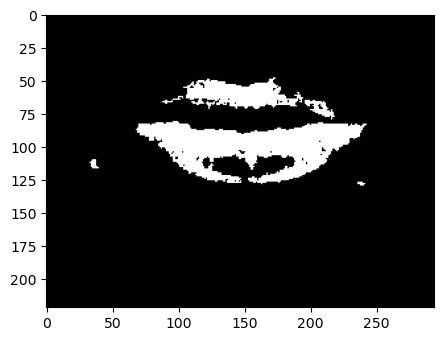

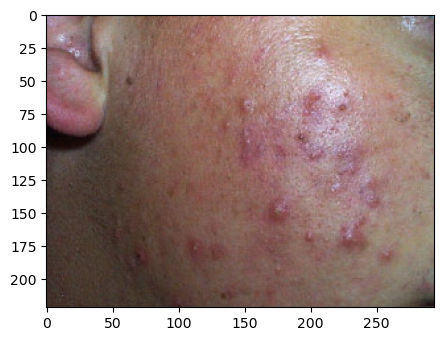

(222, 294, 3)
-4.656613e-10 1.0


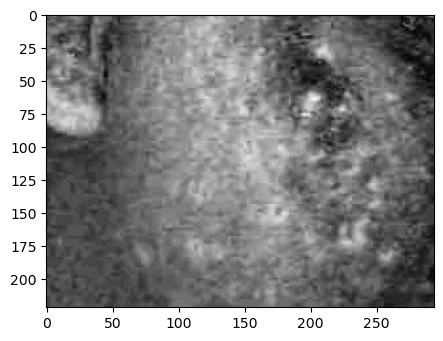

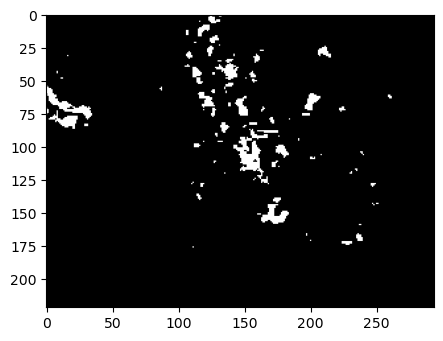

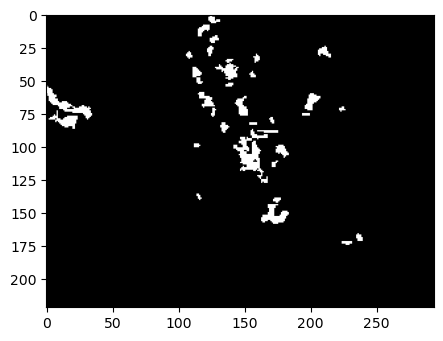

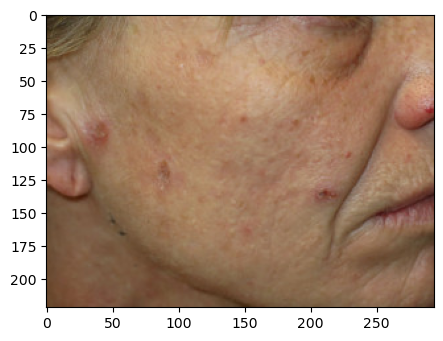

(222, 294, 3)
0.0 0.99999994


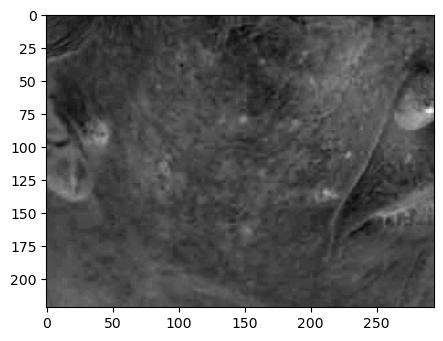

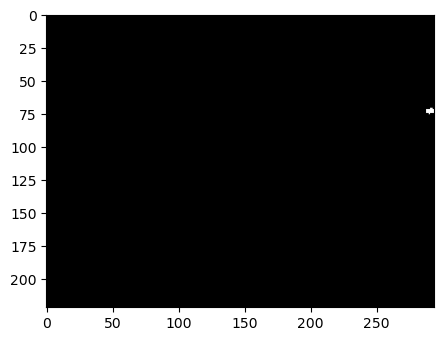

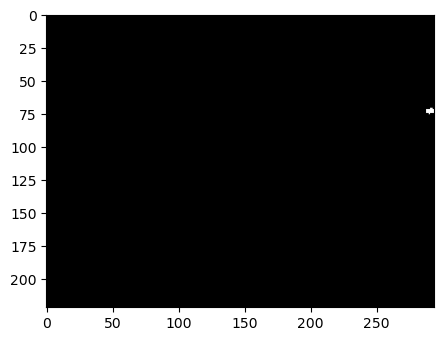

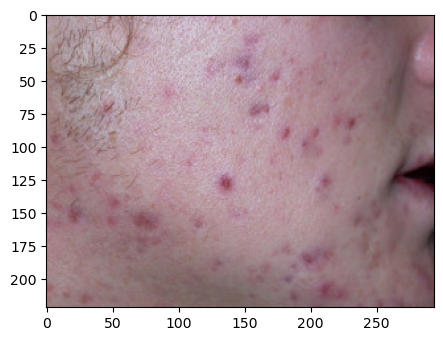

(222, 294, 3)
0.0 0.99999994


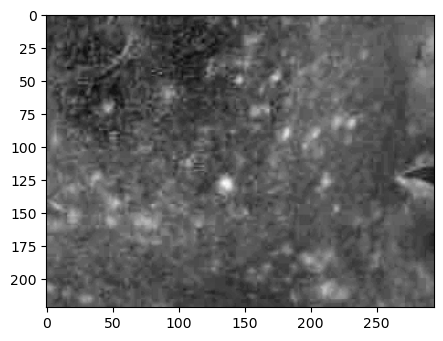

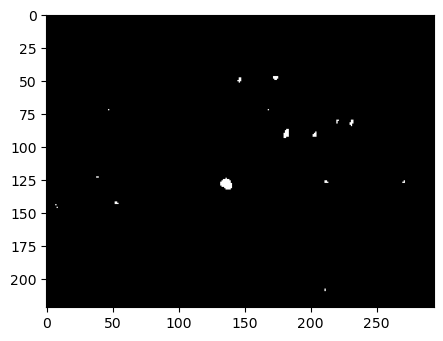

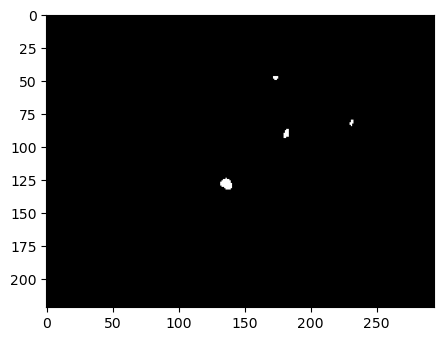

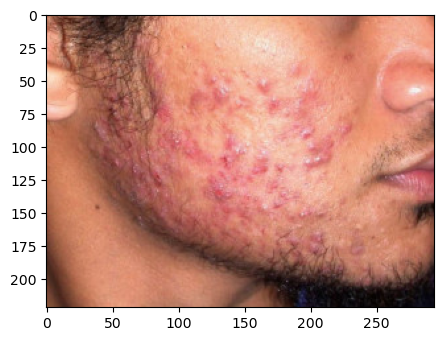

(222, 294, 3)
0.0 0.99999994


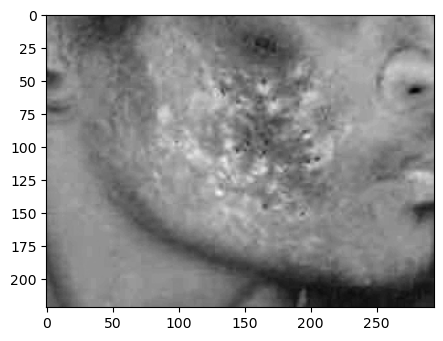

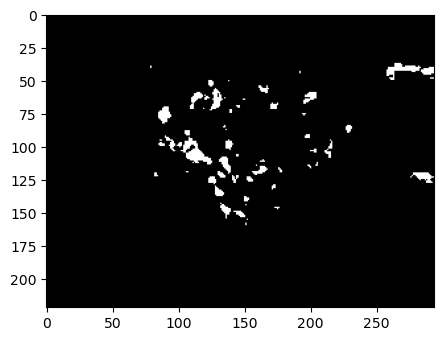

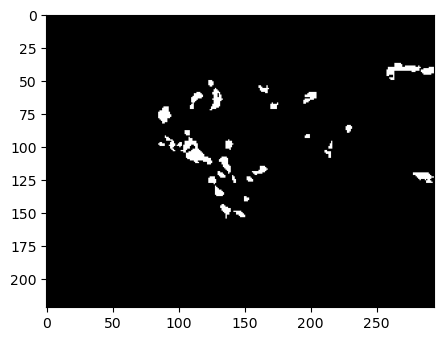

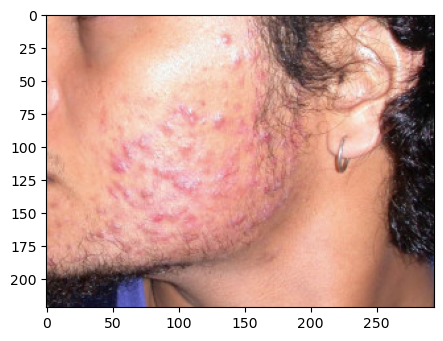

(222, 294, 3)
0.0 1.0


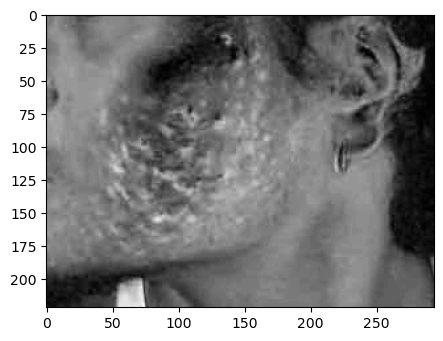

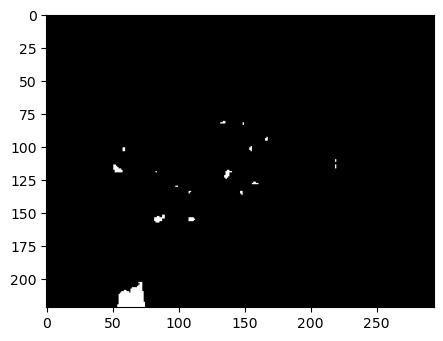

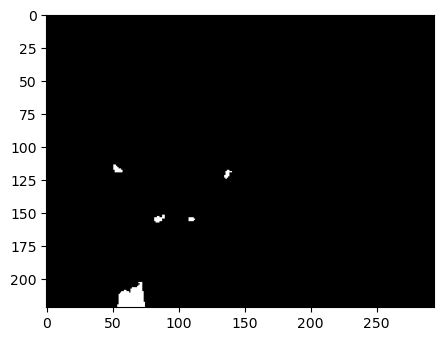

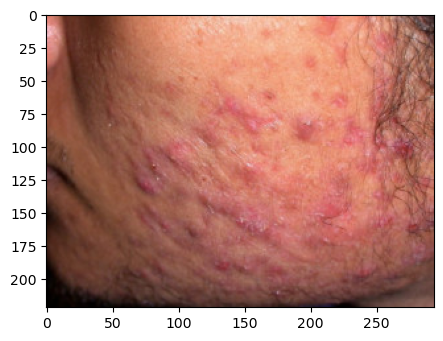

(222, 294, 3)
0.0 1.0


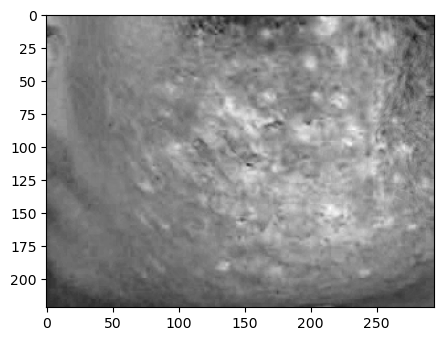

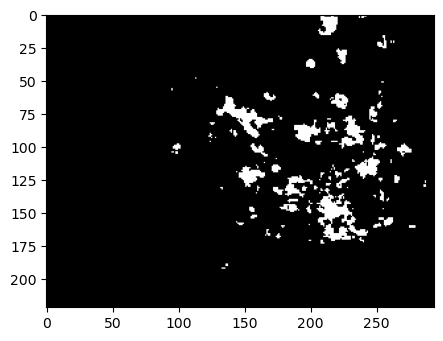

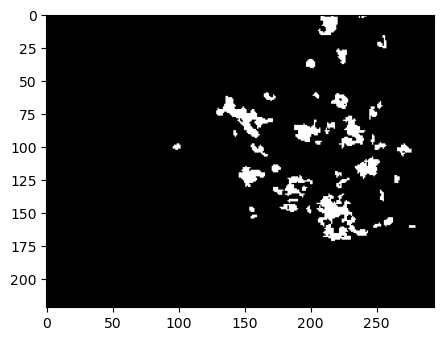

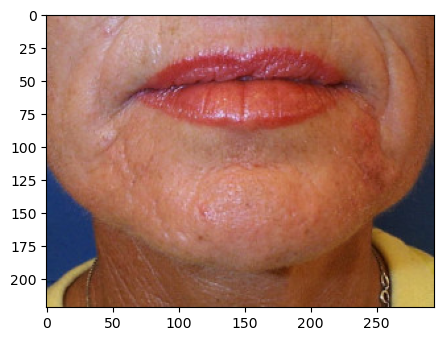

(222, 294, 3)
0.0 1.0


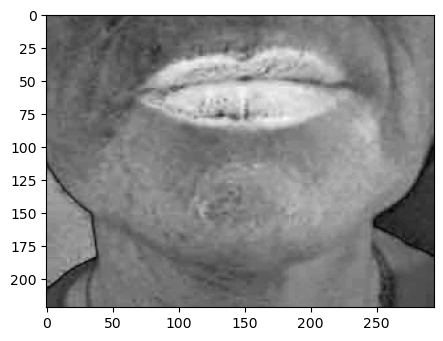

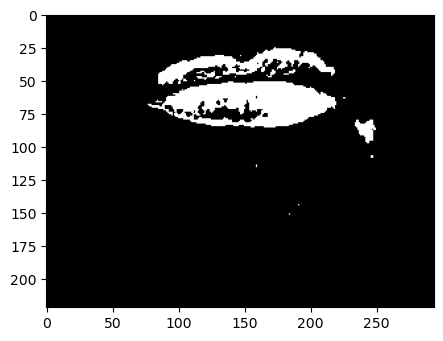

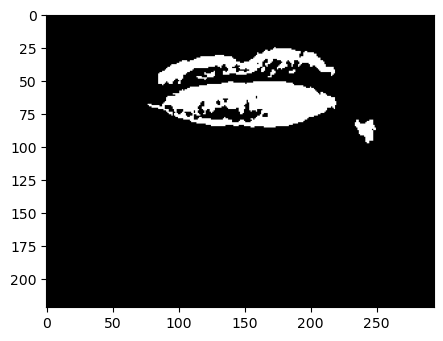

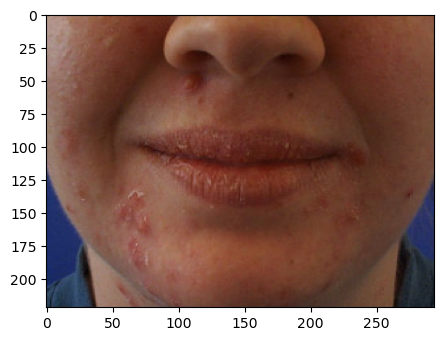

(222, 294, 3)
0.0 1.0


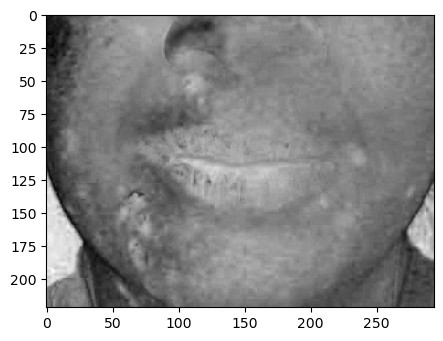

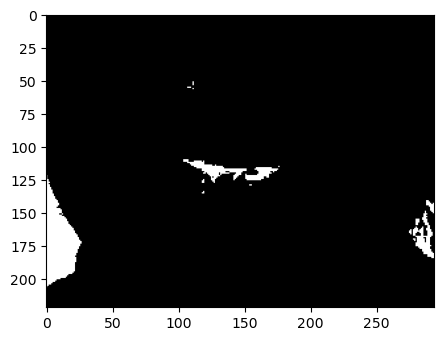

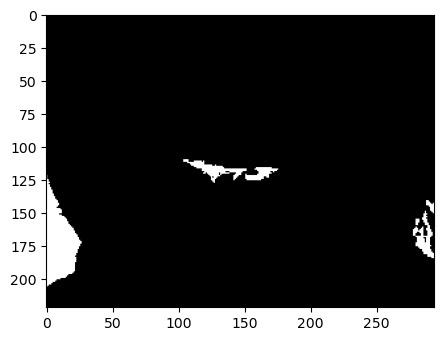

In [4]:
for image_path in imageFileList[:10]:
    print("="*50)
    # get RGB image
    color_image = image_utils().get_image(image_path, image_scale=cv2.COLOR_BGR2RGB, is_gray=False)
    # # image cropping => boundary are unlikely to be the ROI
    # color_image = imagecrop(color_image)
    image_utils().plot_image(color_image,figsize=(5,5))

    print(color_image.shape)

    # convert RGB to grey
    gray_image = image_utils().get_image(image_path, image_scale=cv2.COLOR_BGR2GRAY, is_gray=True)
    # gray_image = imagecrop(gray_image)
    # image_utils().plot_image(gray_image,figsize=(5,5))

    # normalize gray to scale (0,1) minmax
    norm_image = cv2.normalize(gray_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    print(norm_image.min(), norm_image.max())

    # get image in HSV scale
    hsv_image = image_utils().get_image(image_path, image_scale=cv2.COLOR_BGR2HSV, is_gray=False)
    # hsv_image = imagecrop(hsv_image)
    #  Extract Brightness component (V) from HSV image and normalize it into scale of (0,1)
    V = hsv_image[...,2]
    norm_v_image = cv2.normalize(V, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # image_utils().plot_image(norm_v_image,figsize=(5,5))

    # Subtraction for Region of Interest (ROI)
    ROI_image = (norm_v_image - norm_image)
    ROI_image = imadjust(ROI_image, ROI_image.min(), ROI_image.max(), 0,1)
    image_utils().plot_image(ROI_image,figsize=(5,5))
    
    # Thresholding convert to boolean image map
    BTh = 0.73
    binary_threshold_image = ROI_image > BTh
    image_utils().plot_image(binary_threshold_image,figsize=(5,5))

    # Removing minum and maximum areas around the image. Use the morphological
    # concept of convex component CC
    binary_threshold_image = morphology.remove_small_objects(binary_threshold_image, 10)
    image_utils().plot_image(binary_threshold_image,figsize=(5,5))
    all_labels = measure.label(binary_threshold_image)
    S = measure.regionprops(all_labels)
    # print(all_labels)
    # print(S)
    
    # binary_threshold_image2 = ismember(all_labels, np.where([S.Area] < 50))
    # image_utils().plot_image(binary_threshold_image2,figsize=(5,5))